### Nome: Pedro Henrique de A. Gomes

Orientações:

1 - Acesse a base pública disponibilizada no link: http://insideairbnb.com/get-the-data.html

2 - Utilize os dados do Airbnb do Rio de Janeiro (listings.csv.gz)

3 - Faça uma análise exploratória para avaliar a consistência dos dados (pré-processamentos necessários)

4 - Crie um pipeline para um modelo classificação do room type (feature ‘room_type’).

5 - Responda aos questionamentos que se segue:
- Qual o processo utilizado para definir a sua estratégia de modelagem?
- Qual o critério utilizado na seleção do modelo final?
- Você utilizou algum tipo de validação para o modelo? Se sim, qual o processo adotado? Por que escolheu utilizar este método?
- Quais métricas lhe garantiu que o modelo que você desenvolveu é bom?

## Bibliotecas:

In [1]:
import pandas as pd
pd.__version__
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

## Importando a base de dados:

In [5]:
data = pd.read_csv('listings/listings.csv')
data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20210717121617,2021-07-17,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,...,4.90,4.76,4.65,NaN,t,1,1,0,0,2.11
1,24480,https://www.airbnb.com/rooms/24480,20210717121617,2021-07-17,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,"The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,...,4.90,4.97,4.58,NaN,f,1,1,0,0,0.88
2,25026,https://www.airbnb.com/rooms/25026,20210717121617,2021-07-17,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,102840,https://www.airbnb.com/users/show/102840,...,4.90,4.81,4.56,NaN,f,2,2,0,0,1.89
3,35636,https://www.airbnb.com/rooms/35636,20210717121617,2021-07-18,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,The apartment street is very quiet and safe ....,https://a0.muscache.com/pictures/20009355/38b6...,153232,https://www.airbnb.com/users/show/153232,...,4.88,4.90,4.65,NaN,f,1,1,0,0,1.97
4,35764,https://www.airbnb.com/rooms/35764,20210717121617,2021-07-17,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,https://www.airbnb.com/users/show/153691,...,4.94,4.93,4.87,NaN,f,1,1,0,0,3.05


Analisando relevância do dado:

In [7]:
data.iloc[:, 0:35].head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms
0,17878,https://www.airbnb.com/rooms/17878,20210717121617,2021-07-17,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,...,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.96599,-43.17940,Entire condominium,Entire home/apt,5,NaN
1,24480,https://www.airbnb.com/rooms/24480,20210717121617,2021-07-17,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,"The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,...,t,"Rio de Janeiro, Brazil",Ipanema,NaN,-22.98405,-43.20189,Entire apartment,Entire home/apt,2,NaN
2,25026,https://www.airbnb.com/rooms/25026,20210717121617,2021-07-17,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,102840,https://www.airbnb.com/users/show/102840,...,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.97735,-43.19105,Entire apartment,Entire home/apt,2,NaN
3,35636,https://www.airbnb.com/rooms/35636,20210717121617,2021-07-18,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,The apartment street is very quiet and safe ....,https://a0.muscache.com/pictures/20009355/38b6...,153232,https://www.airbnb.com/users/show/153232,...,t,"Rio de Janeiro, Brazil",Ipanema,NaN,-22.98839,-43.19232,Entire apartment,Entire home/apt,2,NaN
4,35764,https://www.airbnb.com/rooms/35764,20210717121617,2021-07-17,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,https://www.airbnb.com/users/show/153691,...,f,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.98107,-43.19136,Entire loft,Entire home/apt,2,NaN


Dropando alguns dados desnecessários:

In [154]:
data.drop(['id','listing_url', 'scrape_id','name', 'description',
                 'neighborhood_overview', 'picture_url', 
                 'host_id', 'host_url','host_name','host_location',
                 'host_about','host_thumbnail_url', 'host_picture_url',
                 'neighbourhood_group_cleansed','amenities','bathrooms','calendar_updated',
                 'has_availability','license','minimum_minimum_nights',
                 'maximum_minimum_nights', 'minimum_maximum_nights',
                  'maximum_maximum_nights','minimum_nights_avg_ntm',
                   'maximum_nights_avg_ntm','number_of_reviews_ltm','first_review',
                   'last_review','calendar_last_scraped','last_scraped','host_verifications',
                   'calculated_host_listings_count_entire_homes',
                   'calculated_host_listings_count_private_rooms',
                   'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)
data.head()


,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
0,2010-01-08,within an hour,100%,98%,f,Copacabana,2.0,2.0,t,t,...,4.68,4.78,4.63,4.82,4.90,4.76,4.65,t,1,2.11
1,2010-03-26,within a day,100%,NaN,f,Ipanema,0.0,0.0,t,t,...,4.73,4.83,4.78,4.90,4.90,4.97,4.58,f,1,0.88
2,2010-04-03,a few days or more,40%,21%,f,Copacabana,3.0,3.0,t,t,...,4.68,4.65,4.76,4.77,4.90,4.81,4.56,f,2,1.89
3,2010-06-27,within an hour,100%,NaN,t,Ipanema,1.0,1.0,t,t,...,4.72,4.85,4.63,4.85,4.88,4.90,4.65,f,1,1.97
4,2010-06-27,within an hour,100%,98%,t,Copacabana,1.0,1.0,t,f,...,4.90,4.93,4.93,4.96,4.94,4.93,4.87,f,1,3.05


In [155]:
#dados redundantes
data.drop(['neighbourhood','property_type'],axis=1,inplace=True)


In [183]:
data.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

## Algumas análises do data frame:

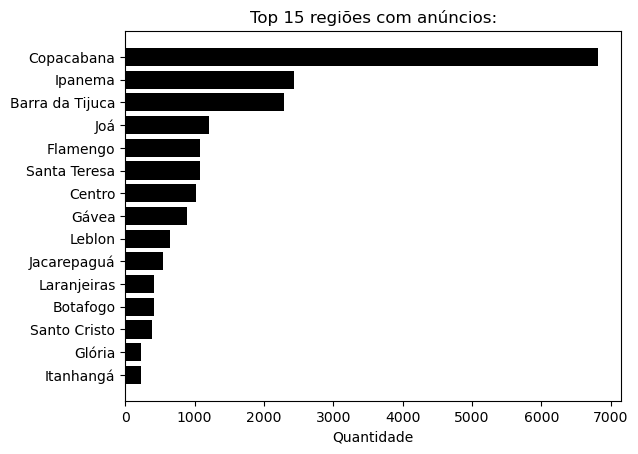

In [151]:
plt.style.use('ggplot')
plt.rcdefaults()
fig, ax = plt.subplots()

#y_pos = np.arange(len(data['neighbourhood_cleansed'].value_counts()))
y_pos=np.arange(15)
values = data['neighbourhood_cleansed'].value_counts()
neighbourhood = data['neighbourhood_cleansed'].unique()

ax.barh(y_pos, values[:15], align='center', color='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(neighbourhood[:15])
ax.invert_yaxis()
ax.set_xlabel('Quantidade')
ax.set_title('Top 15 regiões com anúncios:')

plt.show()

### Queremos um modelo de classificação para room_type:

In [80]:
data["room_type"].value_counts()

Entire home/apt    17172
Private room        5841
Shared room          532
Hotel room            90
Name: room_type, dtype: int64

Podemos selecionar algumas colunas de dados mais importantes relacionados ao 'room', neste caso, pode-se deixar de lado informações do host e focar em informações da 'room', como quantidade de banheiros, quartos, preço, entre outras.

In [207]:
data.filter(items=['beds','room_type']).groupby('room_type').describe()

beds                                              
                   count      mean       std  min  25%  50%  75%   max
room_type                                                             
Entire home/apt  17082.0  2.838485  2.261171  0.0  2.0  2.0  4.0  91.0
Hotel room          83.0  2.518072  4.722446  1.0  1.0  1.0  2.0  41.0
Private room      5720.0  1.611014  1.740837  0.0  1.0  1.0  2.0  50.0
Shared room        522.0  3.764368  4.147477  0.0  1.0  2.0  5.0  30.0

A média de camas por tipo de sala é um dos dados relevantes.

In [206]:
data.filter(items=['minimum_nights','room_type']).groupby('room_type').describe()

minimum_nights                                           \
                         count      mean        std  min  25%  50%  75%   
room_type                                                                 
Entire home/apt        17172.0  5.376252  21.523547  1.0  2.0  3.0  4.0   
Hotel room                90.0  2.566667   5.218915  1.0  1.0  1.0  2.0   
Private room            5841.0  3.728642  18.520652  1.0  1.0  2.0  3.0   
Shared room              532.0  3.627820  17.139085  1.0  1.0  1.0  3.0   

                         
                    max  
room_type                
Entire home/apt  1100.0  
Hotel room         30.0  
Private room     1000.0  
Shared room       365.0

## Converter dados importantes em valores numericos:

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23635 entries, 0 to 23634
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_since                      23628 non-null  object 
 1   host_response_time              14237 non-null  object 
 2   host_response_rate              14237 non-null  object 
 3   host_acceptance_rate            14663 non-null  object 
 4   host_is_superhost               23628 non-null  object 
 5   host_neighbourhood              13298 non-null  object 
 6   host_listings_count             23628 non-null  float64
 7   host_total_listings_count       23628 non-null  float64
 8   host_has_profile_pic            23628 non-null  object 
 9   host_identity_verified          23628 non-null  object 
 10  neighbourhood_cleansed          23635 non-null  object 
 11  latitude                        23635 non-null  float64
 12  longitude                       

Alguns dados importantes estão em formato de objetos e precisam de uma transformação para ser implementados no modelo de aprendizagem.

In [157]:
data.select_dtypes(include='object')

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,bathrooms_text,price,instant_bookable
0,2010-01-08,within an hour,100%,98%,f,Copacabana,t,t,Copacabana,Entire home/apt,1 bath,$170.00,t
1,2010-03-26,within a day,100%,NaN,f,Ipanema,t,t,Ipanema,Entire home/apt,1 bath,$283.00,f
2,2010-04-03,a few days or more,40%,21%,f,Copacabana,t,t,Copacabana,Entire home/apt,1 bath,$160.00,f
3,2010-06-27,within an hour,100%,NaN,t,Ipanema,t,t,Ipanema,Entire home/apt,1.5 baths,$256.00,f
4,2010-06-27,within an hour,100%,98%,t,Copacabana,t,f,Copacabana,Entire home/apt,1 bath,$120.00,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23630,2014-01-06,within an hour,100%,97%,t,Copacabana,t,t,Ipanema,Entire home/apt,3 baths,$270.00,f
23631,2019-12-20,within an hour,100%,82%,f,NaN,t,t,Barra da Tijuca,Entire home/apt,1 bath,"$9,440.00",f
23632,2019-12-20,within an hour,100%,82%,f,NaN,t,t,Méier,Entire home/apt,1.5 baths,$271.00,f
23633,2014-03-22,a few days or more,27%,46%,f,Copacabana,t,t,Ipanema,Entire home/apt,2.5 baths,$600.00,f


Transformando a quantidade de quartos em um numero:

In [349]:
data['bathrooms_text']=data['bathrooms_text'].apply(lambda x: str(x).replace("baths",""))
data['bathrooms_text']=data['bathrooms_text'].apply(lambda x: str(x).replace("bath",""))
data['bathrooms_text']=data['bathrooms_text'].apply(lambda x: str(x).replace("private",""))
data['bathrooms_text']=data['bathrooms_text'].apply(lambda x: str(x).replace("shared",""))
data['bathrooms_text']=data['bathrooms_text'].apply(lambda x: str(x).replace("Shared half-","NaN"))
data['bathrooms_text']=data['bathrooms_text'].apply(lambda x: str(x).replace("half-","NaN"))
data.bathrooms_text
#apresenta alguns NaN que serão removidos mais a frente

0          1 
1          1 
2          1 
3        1.5 
4          1 
         ... 
23630      3 
23631      1 
23632    1.5 
23633    2.5 
23634      3 
Name: bathrooms_text, Length: 23635, dtype: object

Transformando os custos em numeros:

In [256]:
data['price']=data['price'].apply(lambda x: str(x).replace("$",""))
data['price']=data['price'].apply(lambda x: str(x).replace(",",""))
data.price
data['price'].astype('float64')

0         170.0
1         283.0
2         160.0
3         256.0
4         120.0
          ...  
23630     270.0
23631    9440.0
23632     271.0
23633     600.0
23634     560.0
Name: price, Length: 23635, dtype: float64

Transformando algumas váriaveis booleanas em numeros:

In [369]:
data['instant_bookable']=data['instant_bookable'].apply(lambda x: str(x).replace("t","1"))
data['instant_bookable']=data['instant_bookable'].apply(lambda x: str(x).replace("f","0"))
data['host_is_superhost']=data['host_is_superhost'].apply(lambda x: str(x).replace("t","1"))
data['host_is_superhost']=data['host_is_superhost'].apply(lambda x: str(x).replace("f","0"))
data['instant_bookable'].astype('int64')
#data['host_is_superhost'].astype('int64')

0        1
1        0
2        0
3        0
4        0
        ..
23630    0
23631    0
23632    0
23633    0
23634    1
Name: instant_bookable, Length: 23635, dtype: int64

Fazemos uma filtragem maior dos dados, deixando apenas 'numbers':

In [385]:
select=['room_type','accommodates',  'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
        'review_scores_value', 'instant_bookable']
newdf=data.filter(items=select)
#'bathrooms_text','host_is_superhost',

Mesmo após o tratamento os dados de bathroom e host_is_superhost apresentaram bastante problemas ao serem convertidos para 'numbers', foram removidos, mas não é a melhor solução.

In [386]:
#remove as linhas com celulas vazias
newdf=newdf.dropna()
newdf.head()

,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value,instant_bookable
0,Entire home/apt,5,2.0,2.0,170.00,5,180,317,265,4.68,4.78,4.63,4.82,4.90,4.65,1
1,Entire home/apt,2,1.0,1.0,283.00,3,90,154,85,4.73,4.83,4.78,4.90,4.90,4.58,0
2,Entire home/apt,2,1.0,2.0,160.00,7,60,316,238,4.68,4.65,4.76,4.77,4.90,4.56,0
3,Entire home/apt,2,1.0,1.0,256.00,2,89,167,181,4.72,4.85,4.63,4.85,4.88,4.65,0
4,Entire home/apt,2,1.0,1.0,120.00,3,15,92,363,4.90,4.93,4.93,4.96,4.94,4.87,0


# Preparando os dados para o modelo

In [390]:
X=newdf.drop('room_type',axis=1,inplace=False)
y=newdf.room_type

Dividindo os dados para teste e treino:

In [424]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.7, random_state=0)

Pre-processamento e ajuste de escala dos dados de treino:

In [425]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

Aplicando Random Forest:

In [431]:
clf=RandomForestClassifier(n_estimators=300,min_samples_leaf=2, random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=300, random_state=0)

Após o treinamento do metodo com os dados de teste, conseguimos fazer as previsões com os dados de teste:

In [427]:
y_pred=clf.predict(X_test)

Consegue-se calcular a acurácia do metodo cruzando os dados resultantes de teste e previsão:

In [428]:
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.7280187573270809


- A escolha do classificador se deu por alguns motivos, o erro deste modelo acaba sendo baixo, por trabalhar com diversas árvores, cada uma com um subespaço amostral um pouco difente, isso torna o metodo bem robusto em relação a uma arvore só.
- Além disso, apresenta uma maior segurança quanto a Overfit.

A acurácia(%) resultante foi de 72,80% pode ser melhorada de diversas maneiras.

Na parte do tratamento dos dados:
- Aumentando a quantidade de colunas trazidas dos dados brutos.
- Não foi possivel trazer os dados de bathrooms e isso teve impacto nos resultados, também.
- Também seria interessante fazer uma analise melhor do data frame e validar as colunas que de fato trazem impacto para o 'room_type'.